In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# fname 옵션을 사용하는 방법
import matplotlib.font_manager as fm

path = 'C:\\WINDOWS\\Fonts\\NanumGothicLight.ttf'
fontprop = fm.FontProperties(fname=path, size=15)

In [4]:
eml_df = pd.read_csv('./parsed_eml_3.csv')

C:\Users\bjg37\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (116,117,118,120,121,122,131,132,133,135,136,148,149,155,157,158,159,164,172,173,175,176,186,190,191,192,194,195,196,198,199,202,203,205,207,209,210,211,212,213,215,216,217,218,221,222,223,224,225,226,227,228,229,230,232,233,234,235,236,237,238,239,240,241,242,244,245,246,247,248,249,250,251,252,253,254,255,256,257,259,260,261,262,263,264) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### /body/0/content_header/content-type: 같은 것들끼리 통계내주기

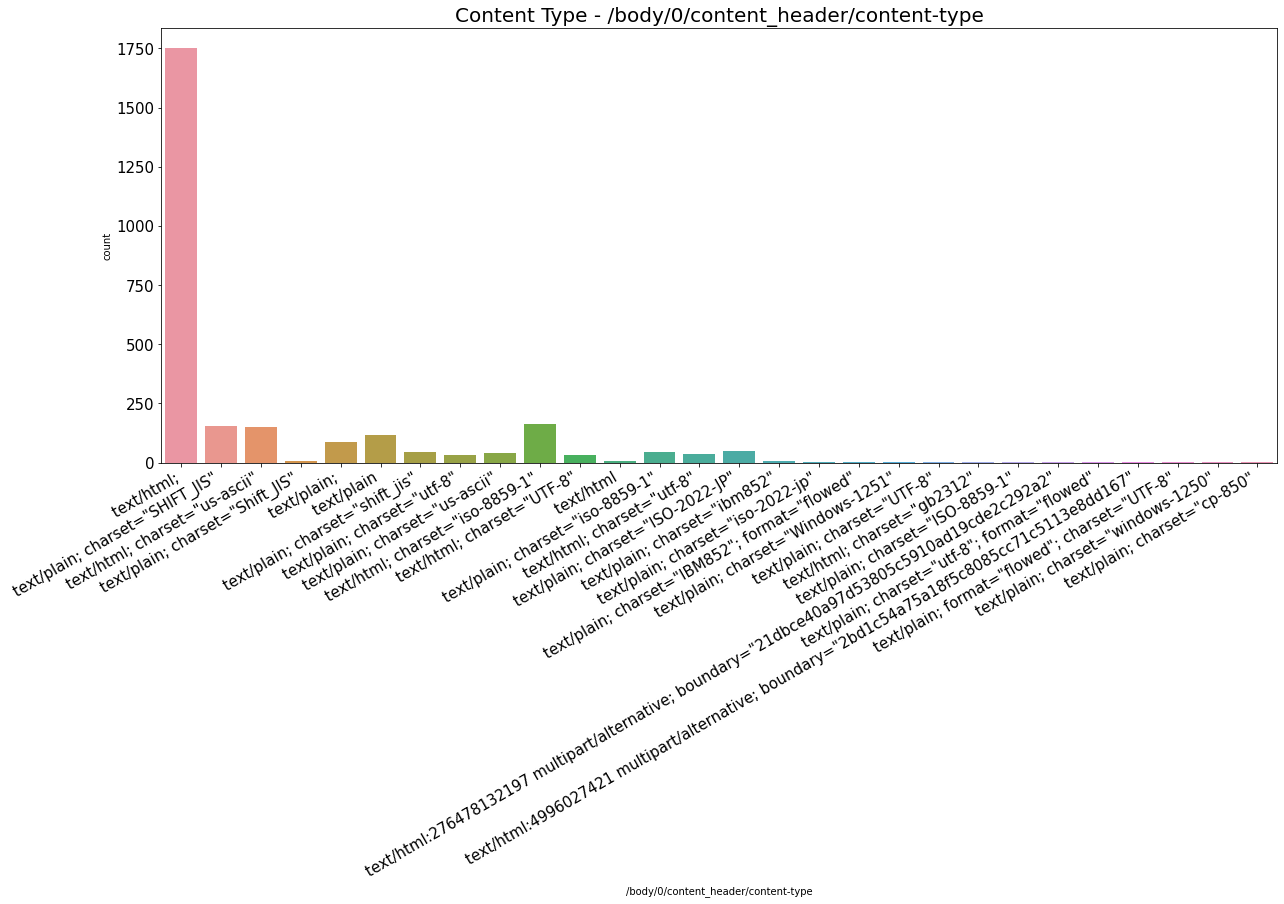

In [17]:
plt.figure(figsize=(20, 8))
plt.title('Content Type - /body/0/content_header/content-type', fontsize=20)
sns.countplot(x="/body/0/content_header/content-type", data=eml_df)
plt.xticks(rotation=30, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### /body/0/content_header/content-transfer-encoding: 같은 것들끼리 통계내주기

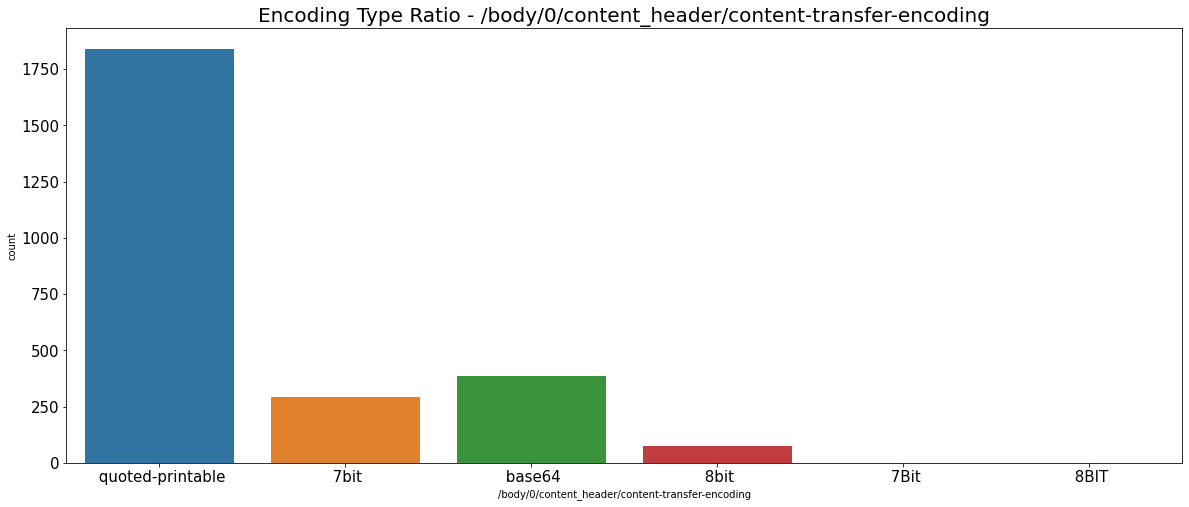

In [36]:
plt.figure(figsize=(20, 8))
plt.title('Encoding Type Ratio - /body/0/content_header/content-transfer-encoding', fontsize=20)
sns.countplot(x="/body/0/content_header/content-transfer-encoding", data=eml_df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [44]:
encoding_type_df = eml_df["/body/0/content_header/content-transfer-encoding"].str.lower().value_counts().rename_axis('encoding_type').reset_index(name='counts')

In [45]:
type(encoding_type_df["counts"][0])

numpy.int64

In [46]:
encoding_type_df["ratio"] = (encoding_type_df["counts"] * 100) / len(eml_df)

In [47]:
encoding_type_df["ratio"] 

0    66.366258
1    13.950973
2    10.562365
3     2.667628
Name: ratio, dtype: float64

In [48]:
100 - 66.366258

33.633742

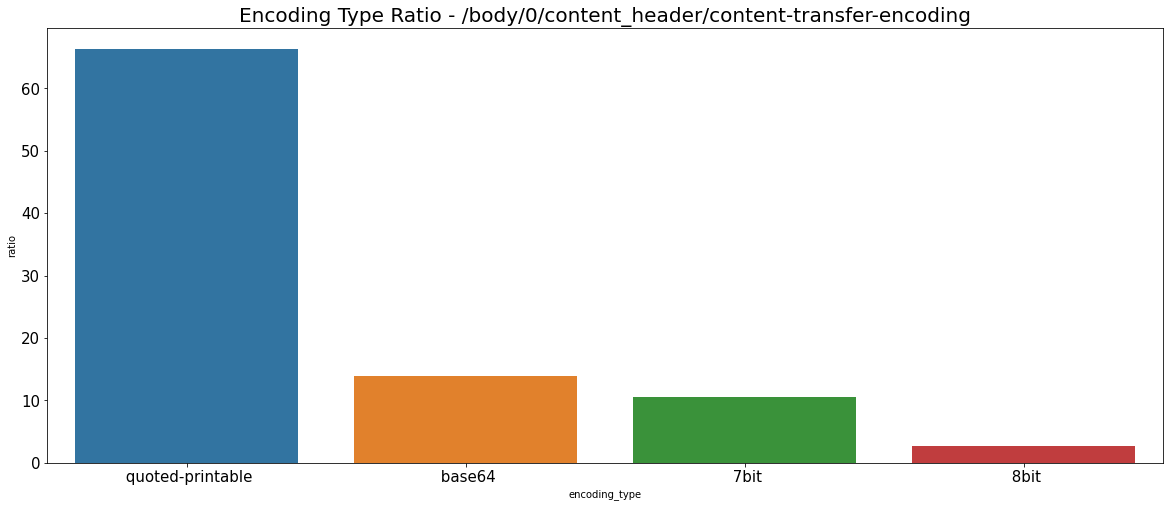

In [49]:
plt.figure(figsize=(20, 8))
plt.title('Encoding Type Ratio - /body/0/content_header/content-transfer-encoding', fontsize=20)
ax = sns.barplot(x="encoding_type", y="ratio", data=encoding_type_df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### /header/from: 중복되는 값만 나오게 하기

In [38]:
# df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
from_df=eml_df['/header/from'].value_counts().rename_axis('from').reset_index(name='counts')
from_limit=from_df.counts>1
from_df[from_limit]

,from,counts
0,suminy@outlook.kr,243
1,yenjuy@outlook.kr,188
2,shinhoan@outlook.kr,170
3,juhan@nate.com,127
4,juyoung@gmail.com,62
...,...,...
140,andrewbellxbzaa@ertelecom.ru,2
141,rebeccagarang11@gmail.com,2
142,jhdngfhsdghshg@gmail.com,2
143,garyrossfegok@edatel.net.co,2


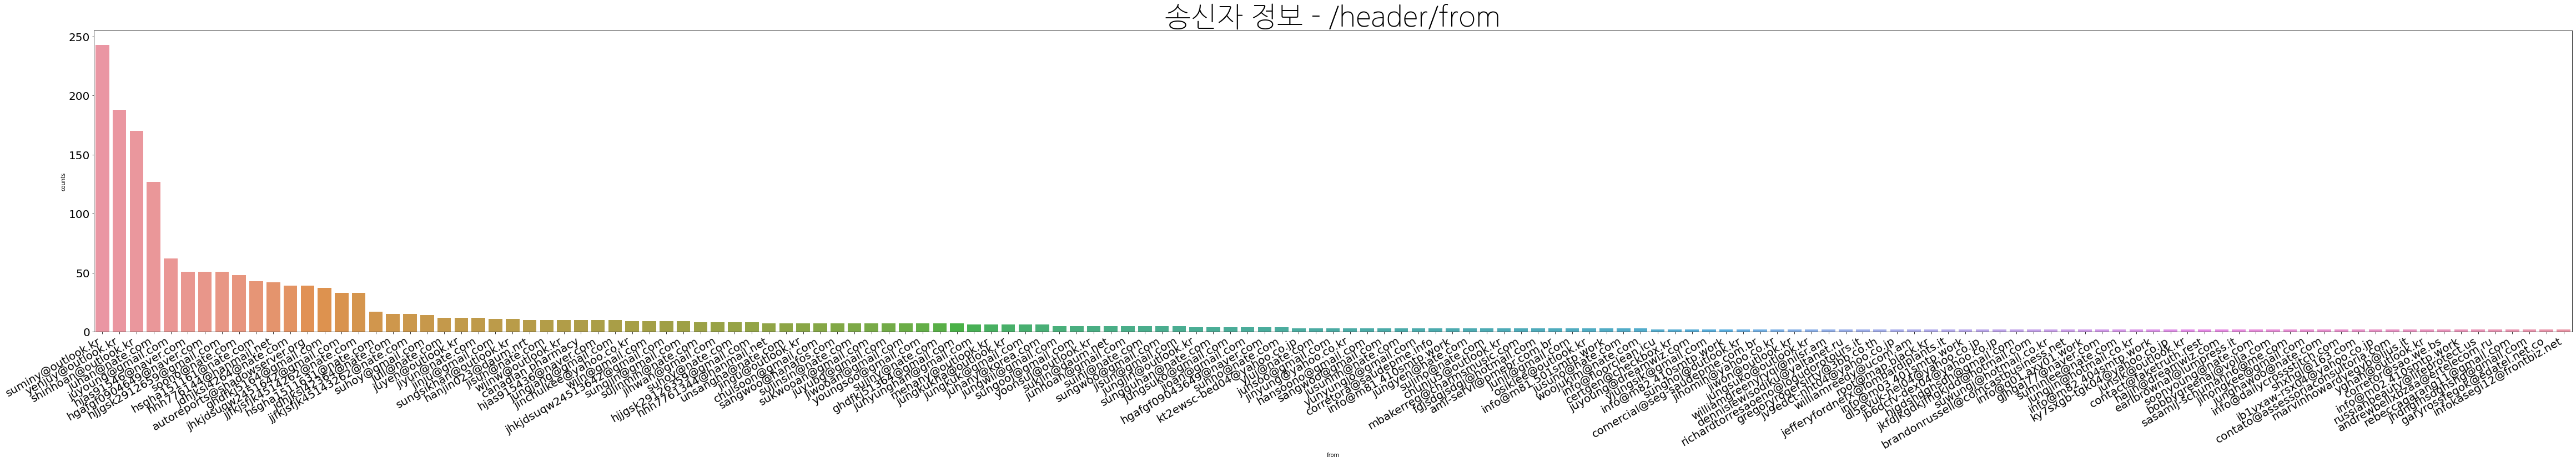

In [61]:
plt.figure(figsize=(80, 10))
plt.title('송신자 정보 - /header/from', fontsize=50, fontproperties=fontprop)
ax = sns.barplot(x="from", y="counts", data=from_df[from_limit])
plt.xticks(rotation=30, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [51]:
from_df["ratio"] = (from_df["counts"] * 100) / len(eml_df)

In [57]:
from_df

,from,counts,ratio
0,suminy@outlook.kr,243,8.759913
1,yenjuy@outlook.kr,188,6.777217
2,shinhoan@outlook.kr,170,6.128335
3,juhan@nate.com,127,4.578226
4,juyoung@gmail.com,62,2.235040
...,...,...,...
1061,ifuxiv@topseller-online.de,1,0.036049
1062,noreply@mailadmin.com,1,0.036049
1063,sani-ammonia7@googlemail.com,1,0.036049
1064,yelectorate6chiakia-mizuki@amazon.co.jp,1,0.036049


In [ ]:
plt.figure(figsize=(80, 10))
plt.title('수신자 정보 비율 - /header/from', fontsize=50, fontproperties=fontprop)
ax = sns.barplot(x="from", y="ratio", data=from_df)
plt.xticks(rotation=30, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### /header/to: 중복되는 값만 나오게 하기

In [59]:
# df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
to_df=eml_df['/header/to'].value_counts().rename_axis('to').reset_index(name='counts')
to_limit=to_df.counts>1

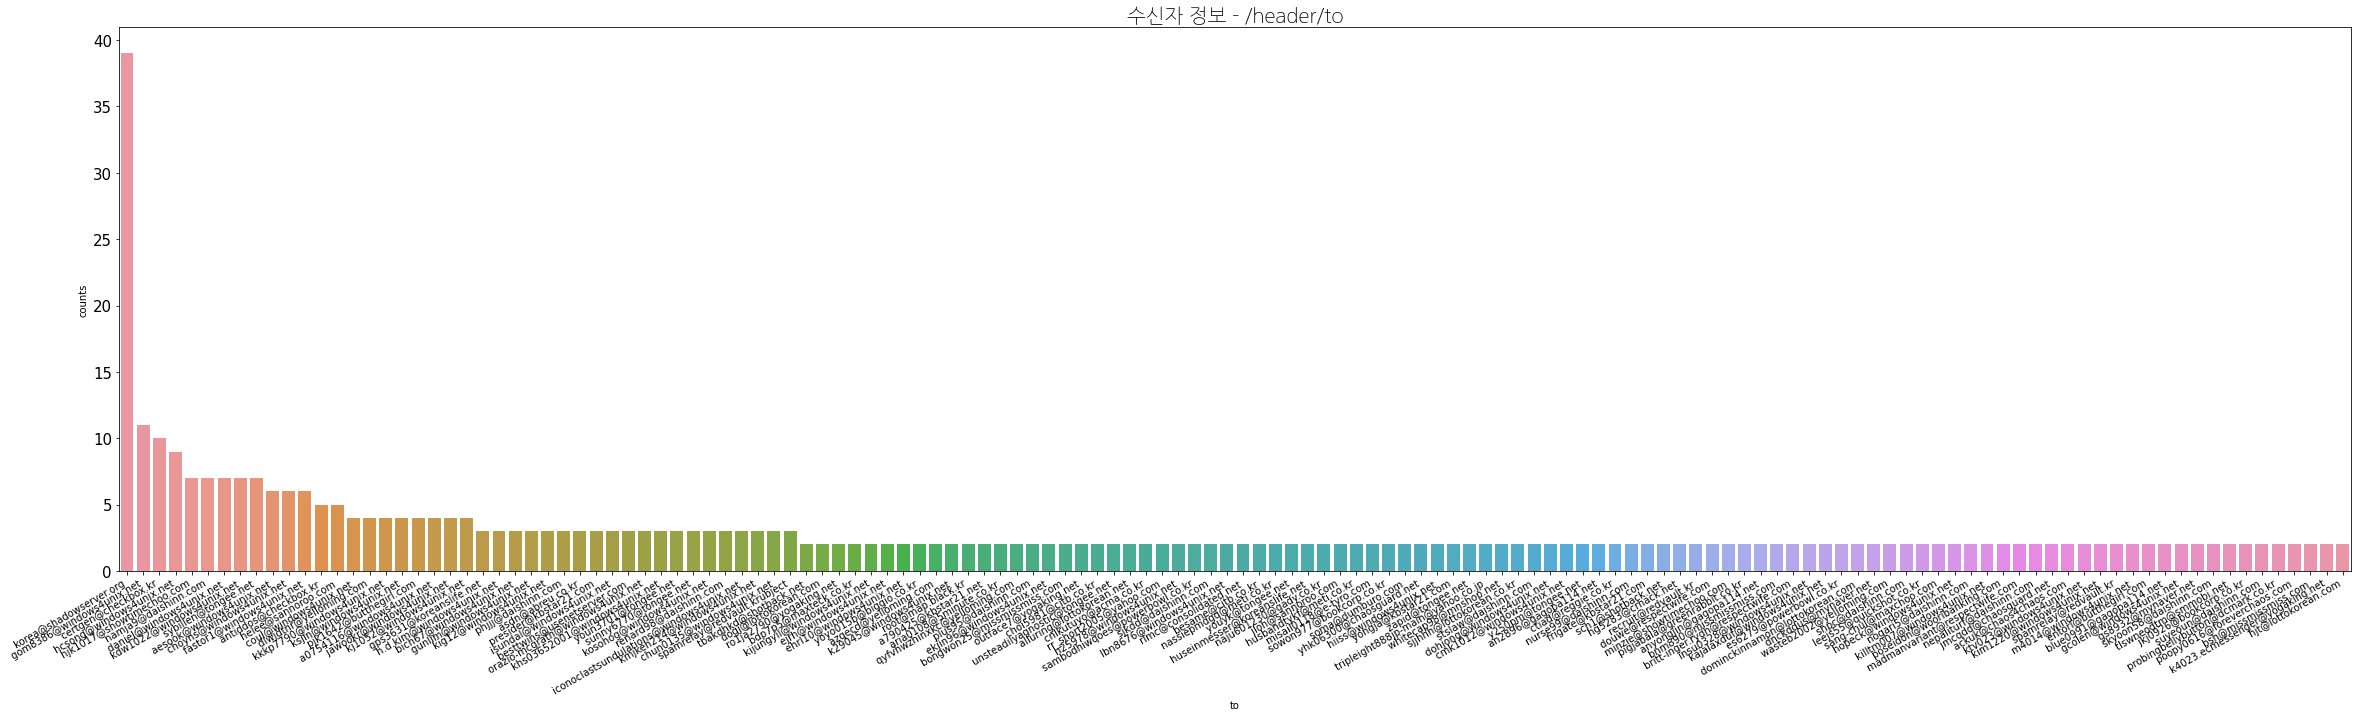

In [60]:
plt.figure(figsize=(40, 10))
plt.title('수신자 정보 - /header/to', fontsize=20, fontproperties=fontprop)
ax = sns.barplot(x="to", y="counts", data=to_df[to_limit])
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=15)
plt.show()

In [62]:
to_df["ratio"] = (to_df["counts"] * 100) / len(eml_df)

In [63]:
to_df

,to,counts,ratio
0,korea@shadowserver.org,39,1.405912
1,gom8386@windows4unix.net,11,0.396539
2,certgen@checkbox.kr,10,0.360490
3,hcsong@windows4unix.net,9,0.324441
4,hjk1017@showtimechoo.com,7,0.252343
...,...,...,...
2448,uhohqrnpyrfd@buntu.co.kr,1,0.036049
2449,weddingceo@koreanslife.com,1,0.036049
2450,lee79ho@yelloming.com,1,0.036049
2451,afoj@chaos4chaos.com,1,0.036049


### /header/date: 뒤에 +00:00 이 부분만 비교해서 같은 것들끼리 통계내주기

In [23]:
date_types = ["/header/date"]

for date_type in date_types:
    #print(date_type)
    is_plus = eml_df[date_type].str.contains('+', na=False, regex=False)
    is_plus_and_nan = eml_df[date_type].str.contains('+', na=True, regex=False)
    
    # +hh:mm 형식 처리
    plus_series = eml_df[is_plus][date_type].str.split('+', expand=True)
    if not plus_series.empty:
        if len(plus_series.columns) != 2 and len(minus_series.columns) != 0: 
            print("**error** '+' 개수:", len(plus_series.columns))
        else:
            # /header/header/date는 +0500, 나머지는 +05:00 형식
            time_zone = plus_series[1].str.findall("\d\d")
            time_zone = time_zone.str.join('')
            time_zone = time_zone.str.rjust(5,'+')
            eml_df.loc[is_plus, date_type+'_timezone'] = time_zone
              
    # -hh:mm 형식 처리
    minus_series = (eml_df[~is_plus_and_nan][date_type].str.split('-', expand=True))
    if not minus_series.empty:
        if len(minus_series.columns) == 4:
            # /header/header/date는 +0500, 나머지는 +05:00 형식
            time_zone = minus_series[3].str.findall("\d\d")
            time_zone = time_zone.str.join('')
            time_zone = time_zone.str.rjust(5,'-')
            eml_df.loc[~is_plus_and_nan, date_type+'_timezone'] = time_zone
        elif len(minus_series.columns) == 2:
            # /header/header/date는 +0500, 나머지는 +05:00 형식
            time_zone = minus_series[1].str.findall("\d\d")
            time_zone = time_zone.str.join('')
            time_zone = time_zone.str.rjust(5,'-')
            eml_df.loc[~is_plus_and_nan, date_type+'_timezone'] = time_zone
        else:
            print("**error** '-' 개수: ", len(minus_ser))
                
    # null값 처리 -> 일단 시각화에 사용하기 위해 'NULL VALUE' 문자열 저장
    null_series = eml_df[date_type].isnull()
    temp_series = pd.Series(["NULL VALUE"]*len(null_series))
    eml_df.loc[null_series, date_type+"_timezone"] = temp_series

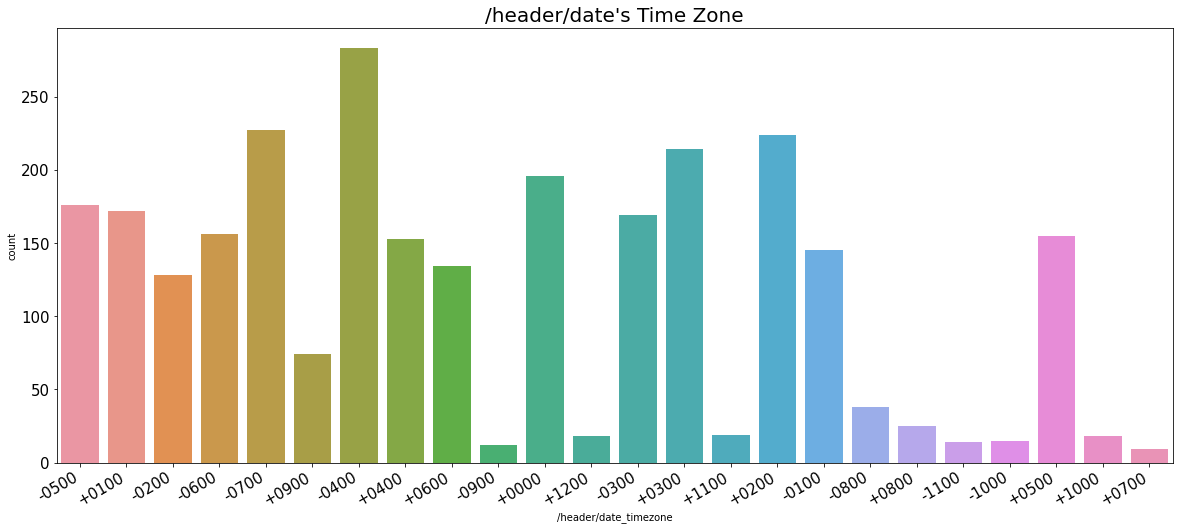

In [25]:
plt.figure(figsize=(20,8))
plt.title("/header/date's Time Zone", fontsize=20)
sns.countplot(x='/header/date_timezone', data=eml_df)
plt.xticks(rotation=30, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### last_num: 같은 것들끼리 통계 내주기

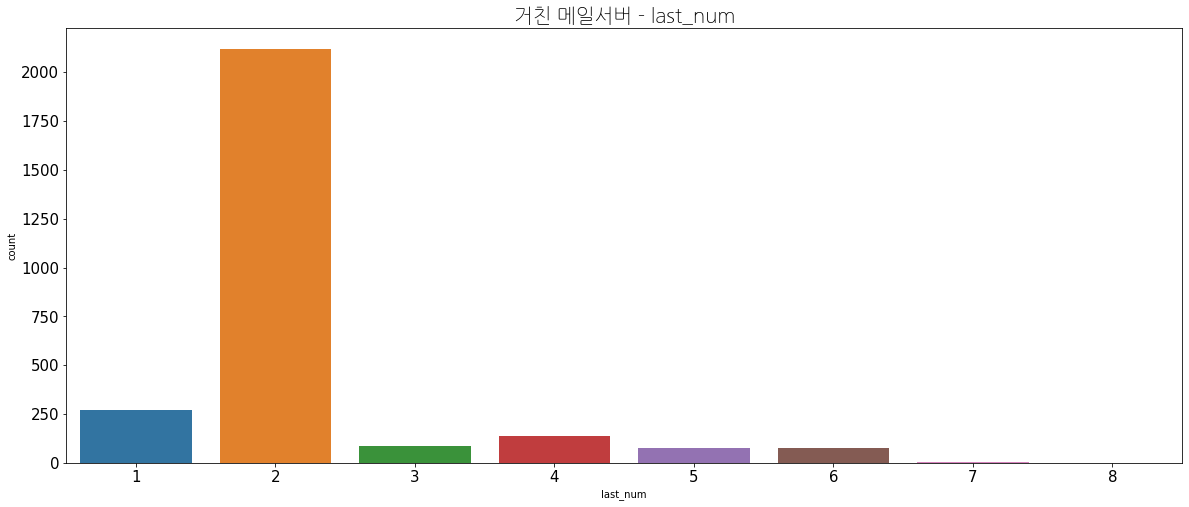

In [29]:
plt.figure(figsize=(20, 8))
plt.title('거친 메일서버 - last_num', fontsize=20, fontproperties=fontprop)
sns.countplot(x="last_num", data=eml_df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [65]:
last_num_df = eml_df['last_num'].value_counts().rename_axis('last_num').reset_index(name='counts')
last_num_df["ratio"] = (last_num_df["counts"] * 100) / len(eml_df)
last_num_df

,last_num,counts,ratio
0,2,2120,76.423937
1,1,273,9.841384
2,4,138,4.974766
3,3,84,3.028118
4,5,78,2.811824
5,6,76,2.739726
6,7,4,0.144196
7,8,1,0.036049


### /header/received/0/with: 같은 것들끼리 통계 내주기

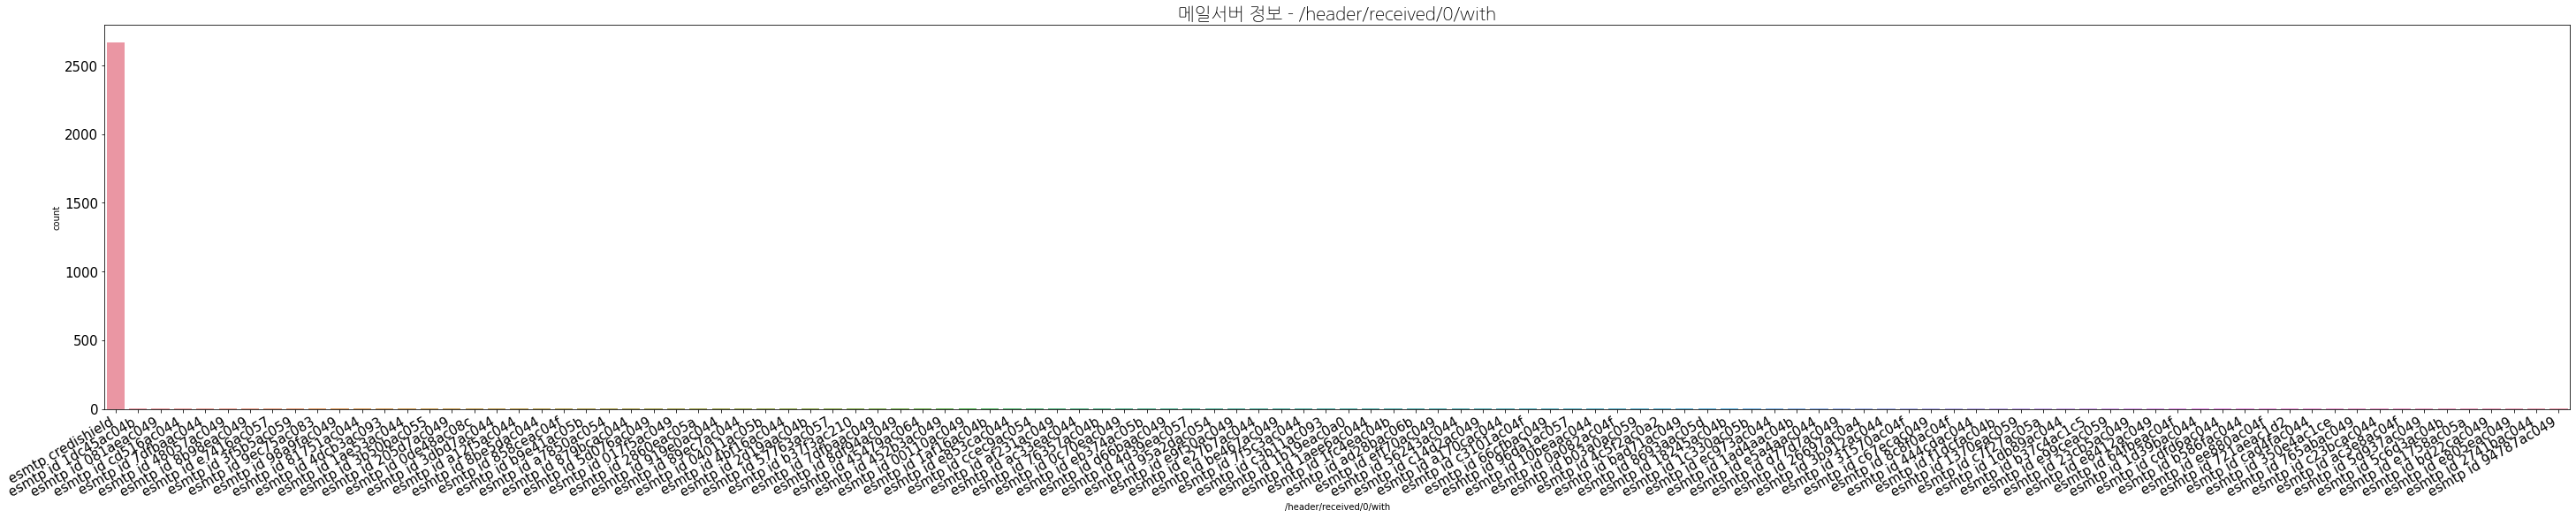

In [31]:
plt.figure(figsize=(50, 8))
plt.title('메일서버 정보 - /header/received/0/with', fontsize=20, fontproperties=fontprop)
sns.countplot(x="/header/received/0/with", data=eml_df)
plt.xticks(rotation=30, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [22]:
# df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
with_df=eml_df['/header/received/0/with'].value_counts().rename_axis('with').reset_index(name='counts')
with_limit=with_df.counts>1

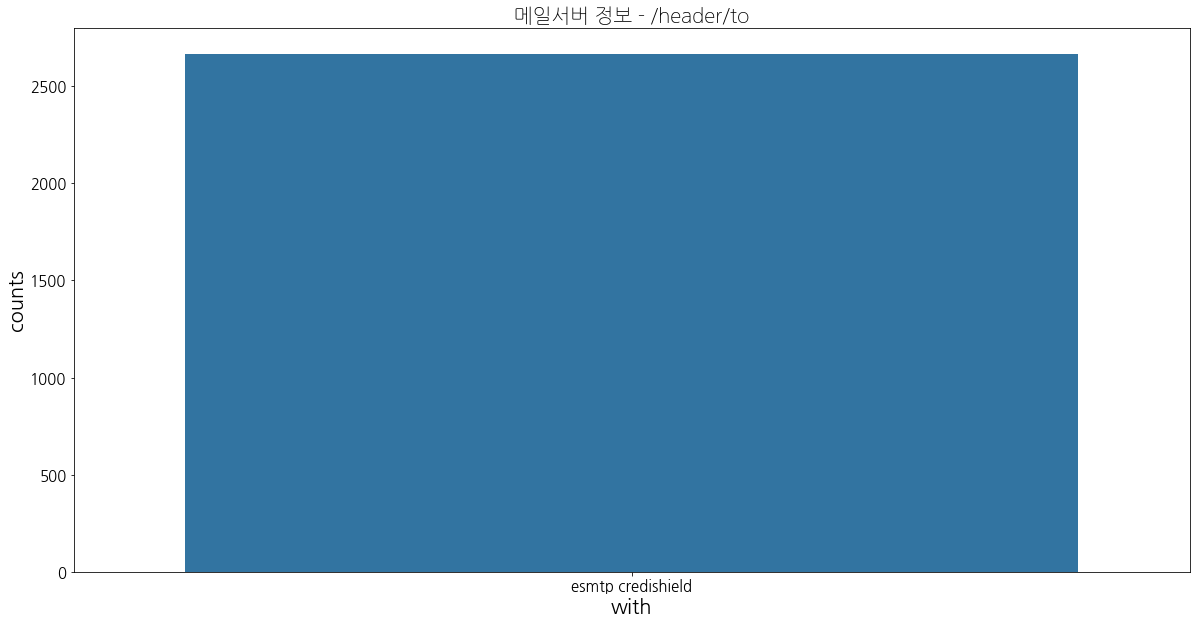

In [23]:
plt.figure(figsize=(20, 10))
plt.title('메일서버 정보 - /header/to', fontsize=20, fontproperties=fontprop)
ax = sns.barplot(x="with", y="counts", data=with_df[with_limit])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 최초 송신자 ip와 최초 송신 시간 결합
하나의 올바른 ip값만 가진 행들만 추출
<br>최초 송신자 IP 정보
- ori_sender_ip
- /header/received/n/from: n = last_num

최초 송신시간 정보
- /header/header/date

In [64]:
# df.b.str.contains('^f')
eml_df['ori_sender_ip'] = eml_df['ori_sender_ip'].str.strip()
is_ip = eml_df.ori_sender_ip.str.match('^[0-9]?[1-9]+[0-9]?.[0-9]?[1-9]+[0-9]?.[0-9]?[1-9]+[0-9]?.[0-9]?[1-9]+[0-9]?$', na=False)

In [65]:
eml_df[is_ip]['ori_sender_ip']

0        229.57.232.163
1         96.68.190.156
3         238.28.124.86
4         139.64.48.231
6         177.84.146.16
             ...       
2764     187.241.99.152
2765     116.228.231.97
2766    111.211.248.235
2770     130.35.151.111
2771    254.220.194.223
Name: ori_sender_ip, Length: 1604, dtype: object

In [70]:
# df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
ip_df=eml_df.loc[is_ip, 'ori_sender_ip'].value_counts().rename_axis('ip').reset_index(name='counts')
ip_limit=ip_df.counts>1

In [71]:
ip_df[ip_limit]

,ip,counts
0,192.161.164.65,3
1,50.245.153.217,3
2,124.3.127.99,2
3,143.161.123.77,2
4,155.94.184.154,2
5,96.68.190.156,2
6,192.168.10.97,2
7,67.60.137.219,2
8,156.96.116.50,2
9,54.144.161.63,2


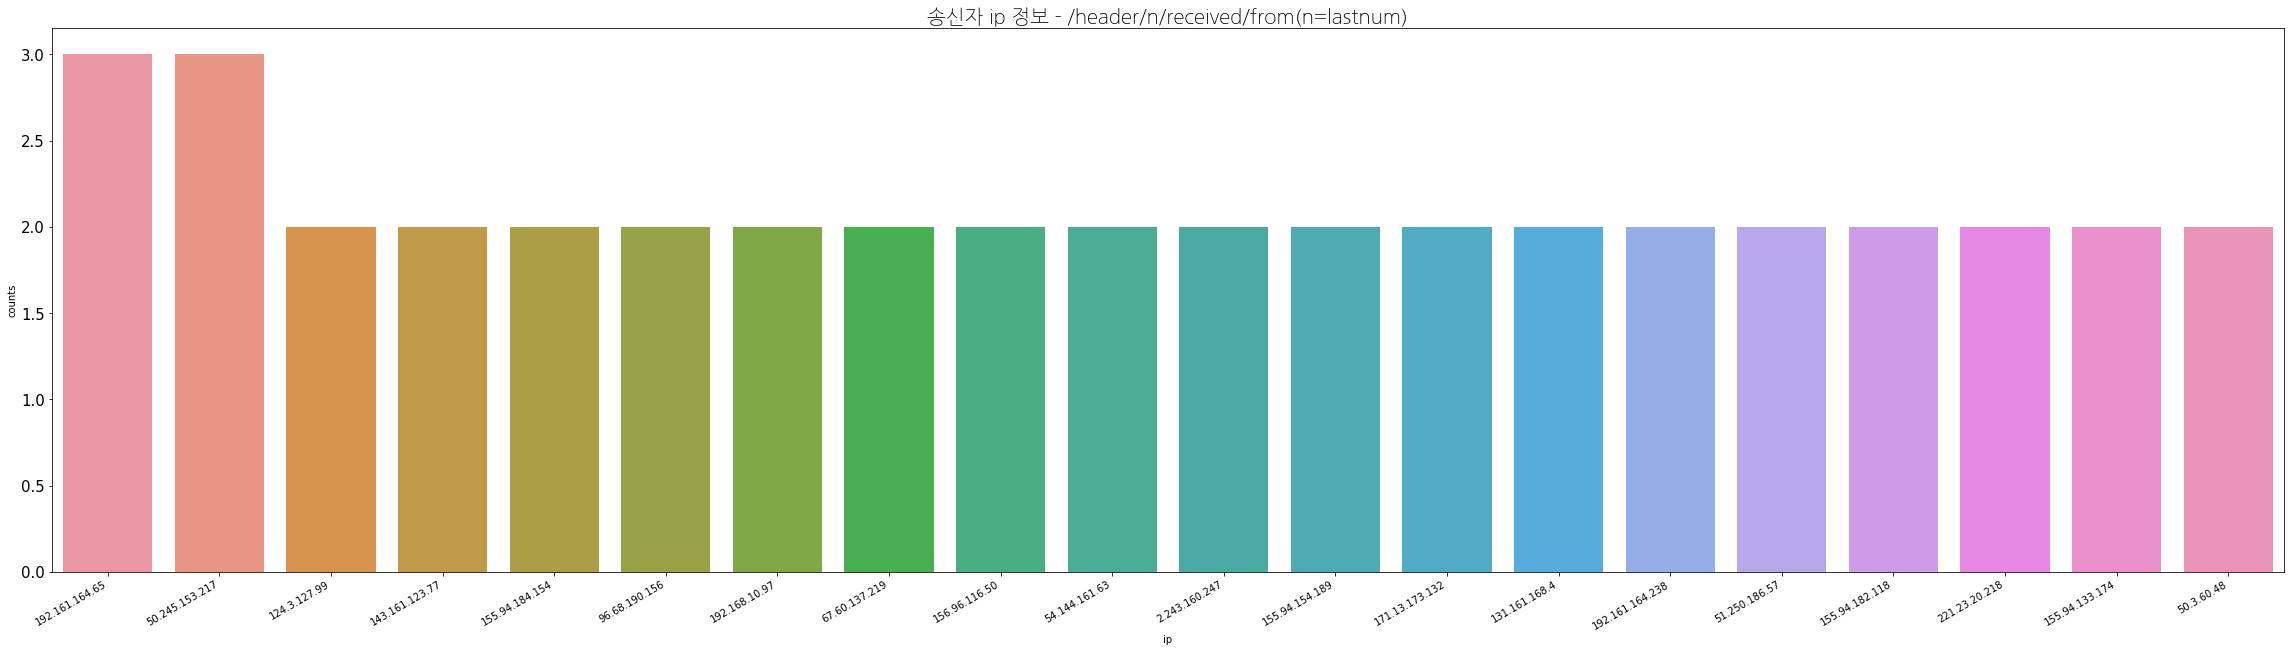

In [73]:
plt.figure(figsize=(40, 10))
plt.title('송신자 ip 정보 - /header/n/received/from(n=lastnum)', fontsize=20, fontproperties=fontprop)
ax = sns.barplot(x="ip", y="counts", data=ip_df[ip_limit])
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=15)
plt.show()

In [64]:
eml_df['sender_info'] = eml_df.loc[is_ip, '/header/header/date'] + " " + eml_df.loc[is_ip, 'ori_sender_ip']

In [65]:
# df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
sender_df=eml_df['sender_info'].value_counts().rename_axis('sender_info').reset_index(name='counts')
sender_limit=sender_df.counts>1

In [66]:
sender_df[sender_limit]

,sender_info,counts
0,"Thu, 26 Mar 2020 21:31:56 +0500 124.3.127.99",2
1,"Tue, 21 Apr 2020 06:38:20 +0600 51.250.186.57",2
2,"Sun, 05 Apr 2020 13:54:13 -0700 50.245.153.217",2
3,"Tue, 02 Jun 2020 06:45:08 +0100 96.68.190.156",2
4,"Sun, 05 Apr 2020 14:55:00 -0400 143.161.123.77",2
5,"Mon, 01 Jun 2020 22:08:16 -0600 54.144.161.63",2
6,"Mon, 15 Jun 2020 01:55:00 +1000 171.13.173.132",2
7,"Thu, 26 Mar 2020 18:39:31 +0200 2.243.160.247",2
8,"Tue, 02 Jun 2020 06:04:43 -0400 50.3.60.48",2
9,"Thu, 26 Mar 2020 11:31:02 -0500 221.23.20.218",2


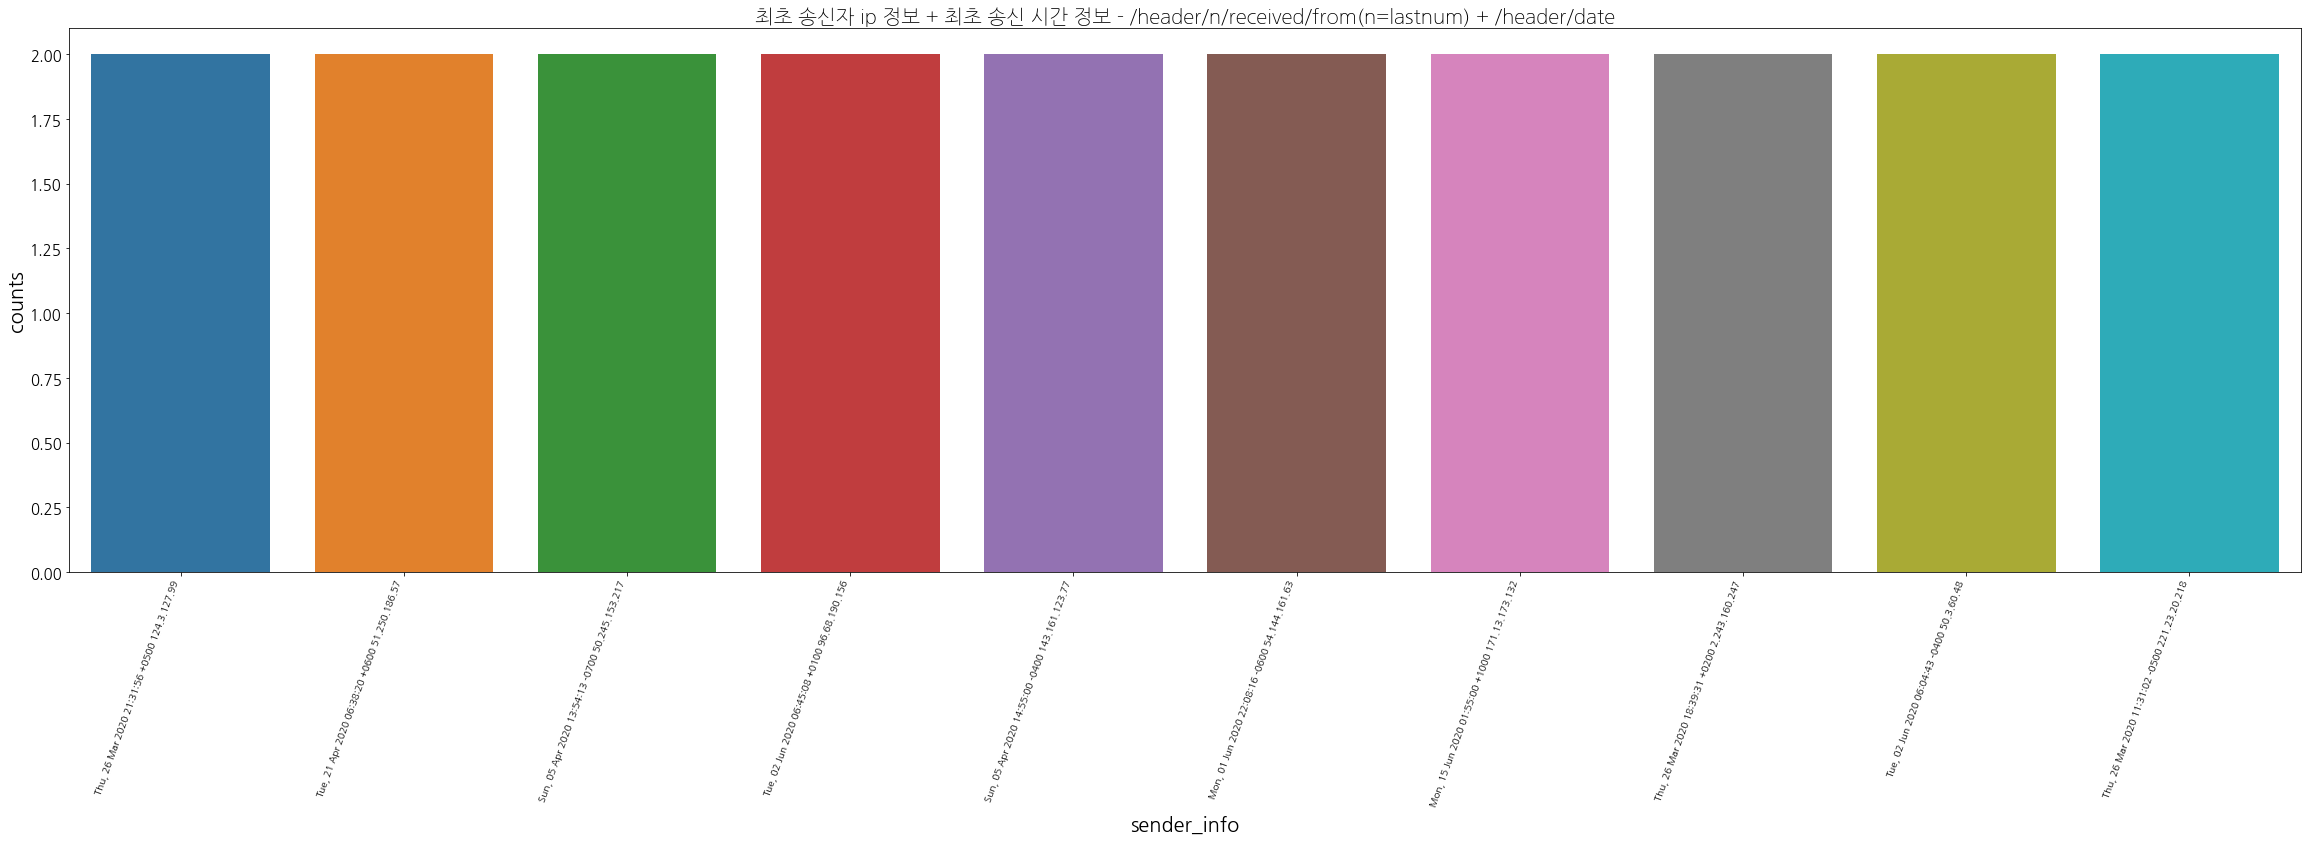

In [67]:
plt.figure(figsize=(40, 10))
plt.title('최초 송신자 ip 정보 + 최초 송신 시간 정보 - /header/n/received/from(n=lastnum) + /header/header/date', fontsize=20, fontproperties=fontprop)
ax = sns.barplot(x="sender_info", y="counts", data=sender_df[sender_limit])
plt.xticks(rotation=70, ha='right', fontsize=10)
plt.yticks(fontsize=15)
plt.show()

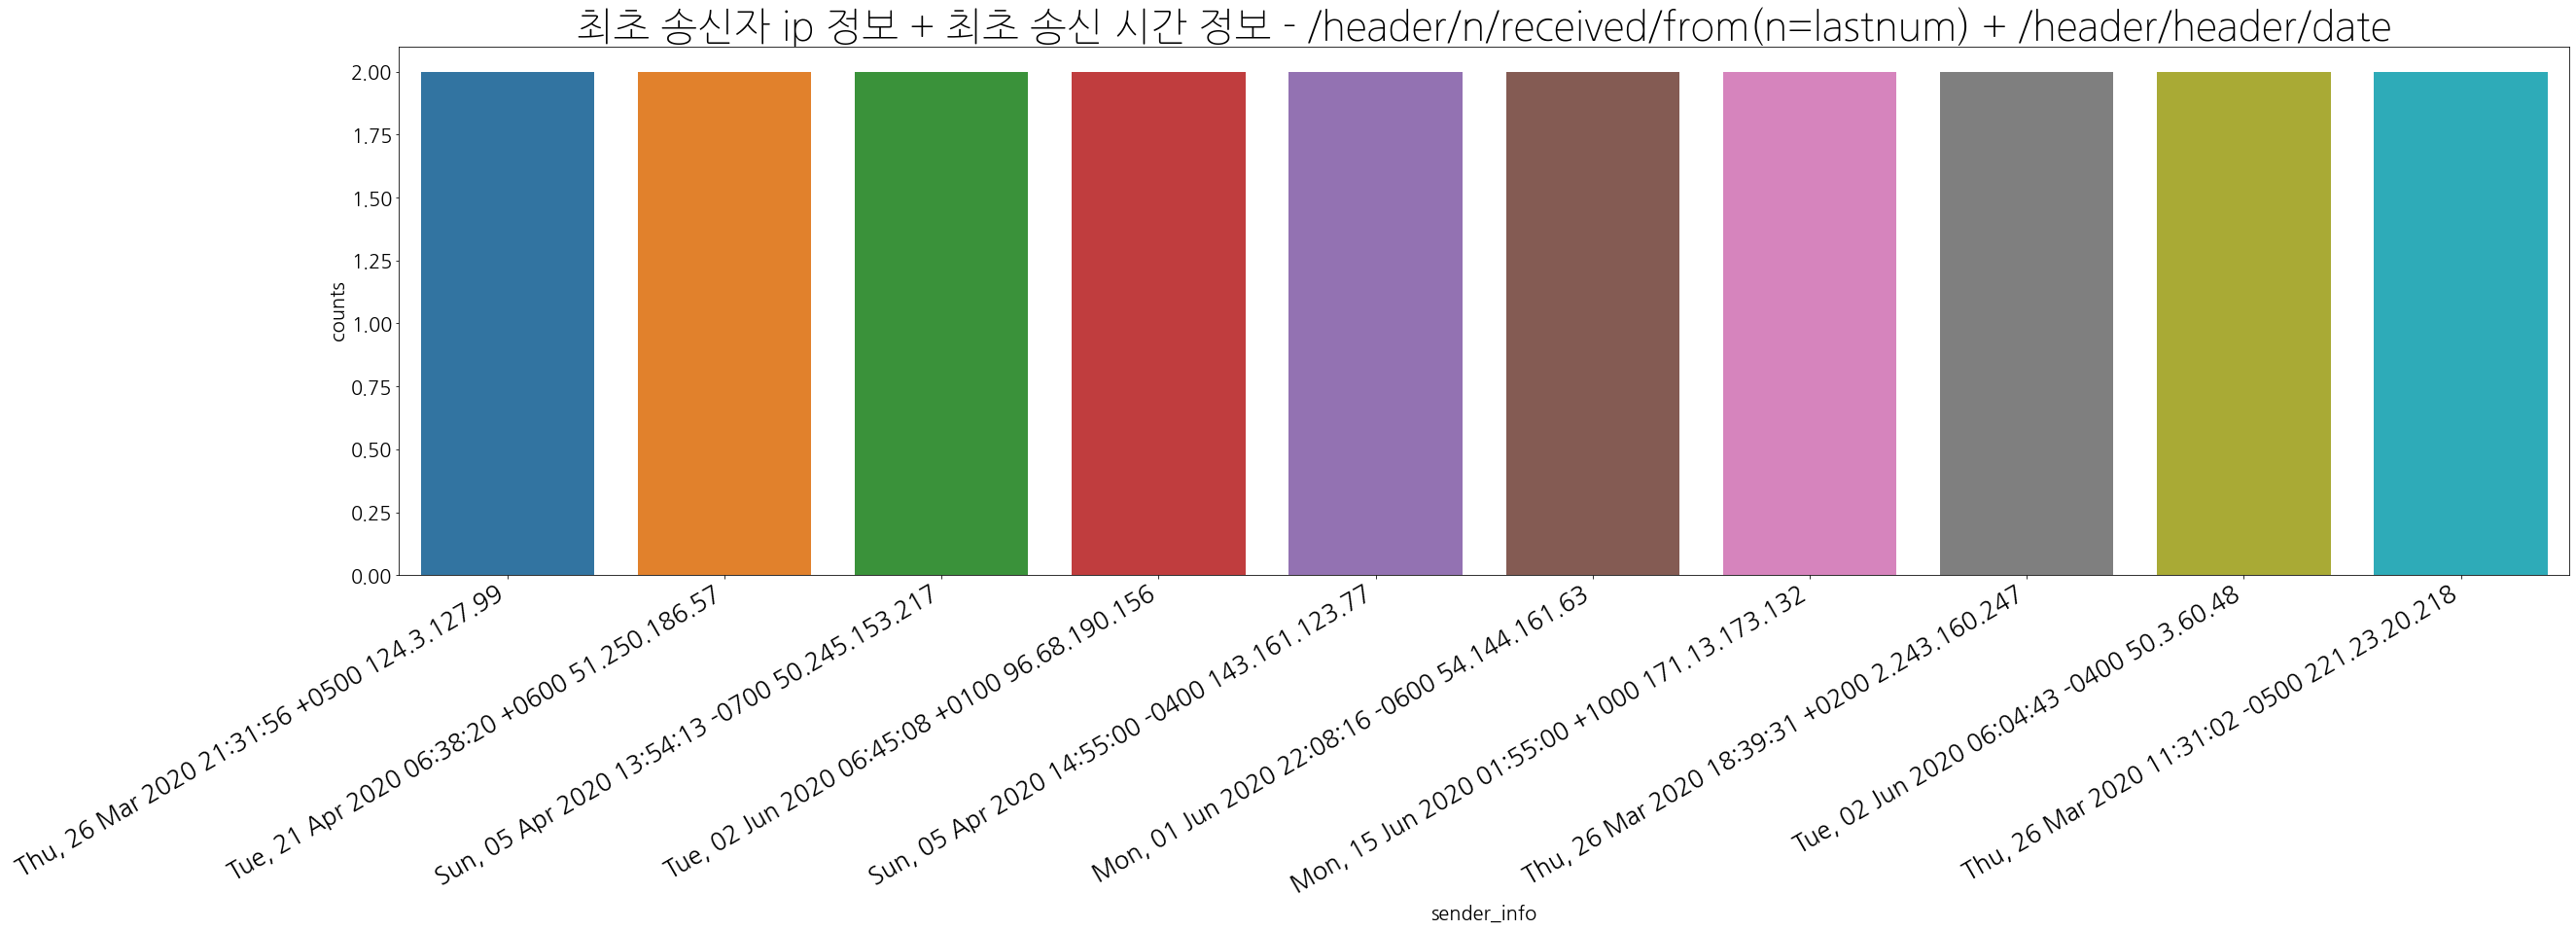

In [78]:
plt.figure(figsize=(40, 10))
plt.title('최초 송신자 ip 정보 + 최초 송신 시간 정보 - /header/n/received/from(n=lastnum) + /header/header/date', fontsize=40, fontproperties=fontprop)
ax = sns.barplot(x="sender_info", y="counts", data=sender_df[sender_limit])
plt.xticks(rotation=30, ha='right', fontsize=25)
plt.yticks(fontsize=20)
plt.show()

### 최초 송신자 ip와 최초 송신자 메일주소의 도메인별 결합
하나의 올바른 ip값만 가진 행들만 추출
<br>최초 송신자 IP 정보
- ori_sender_ip
- /header/received/n/from: n = last_num

최초 송신자 메일주소
- /header/header/mail_from

In [50]:
# df.b.str.contains('^f')
eml_df['ori_sender_ip'] = eml_df['ori_sender_ip'].str.strip()
is_ip = eml_df.ori_sender_ip.str.match('^[0-9]?[1-9]+[0-9]?.[0-9]?[1-9]+[0-9]?.[0-9]?[1-9]+[0-9]?.[0-9]?[1-9]+[0-9]?$', na=False)

In [51]:
eml_df[is_ip]['ori_sender_ip']

0        229.57.232.163
1         96.68.190.156
3         238.28.124.86
4         139.64.48.231
6         177.84.146.16
             ...       
2764     187.241.99.152
2765     116.228.231.97
2766    111.211.248.235
2770     130.35.151.111
2771    254.220.194.223
Name: ori_sender_ip, Length: 1604, dtype: object

In [52]:
# df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
ip_df=eml_df.loc[is_ip, 'ori_sender_ip'].value_counts().rename_axis('ip').reset_index(name='counts')
ip_limit=ip_df.counts>1

In [53]:
ip_df[ip_limit]

,ip,counts
0,192.161.164.65,3
1,50.245.153.217,3
2,96.68.190.156,2
3,155.94.133.174,2
4,192.168.10.97,2
5,171.13.173.132,2
6,155.94.154.189,2
7,67.60.137.219,2
8,143.161.123.77,2
9,156.96.116.50,2


In [13]:
eml_df.loc[is_ip, '/header/header/mail_from'].str.split('@', expand=True)[1]

0             outlook.kr
1              gmail.com
3              gmail.com
4             outlook.kr
6           docomo.ne.jp
              ...       
2764          outlook.kr
2765    incassoresult.nl
2766            nate.com
2770           gmail.com
2771         hanmail.net
Name: 1, Length: 1604, dtype: object

In [15]:
eml_df['sender_info_domain'] = eml_df.loc[is_ip, '/header/header/mail_from'].str.split('@', expand=True)[1] + " " + eml_df.loc[is_ip, 'ori_sender_ip']

In [17]:
# df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
sender_df_domain=eml_df['sender_info_domain'].value_counts().rename_axis('sender_info_domain').reset_index(name='counts')
sender_limit_domain=sender_df_domain.counts>1

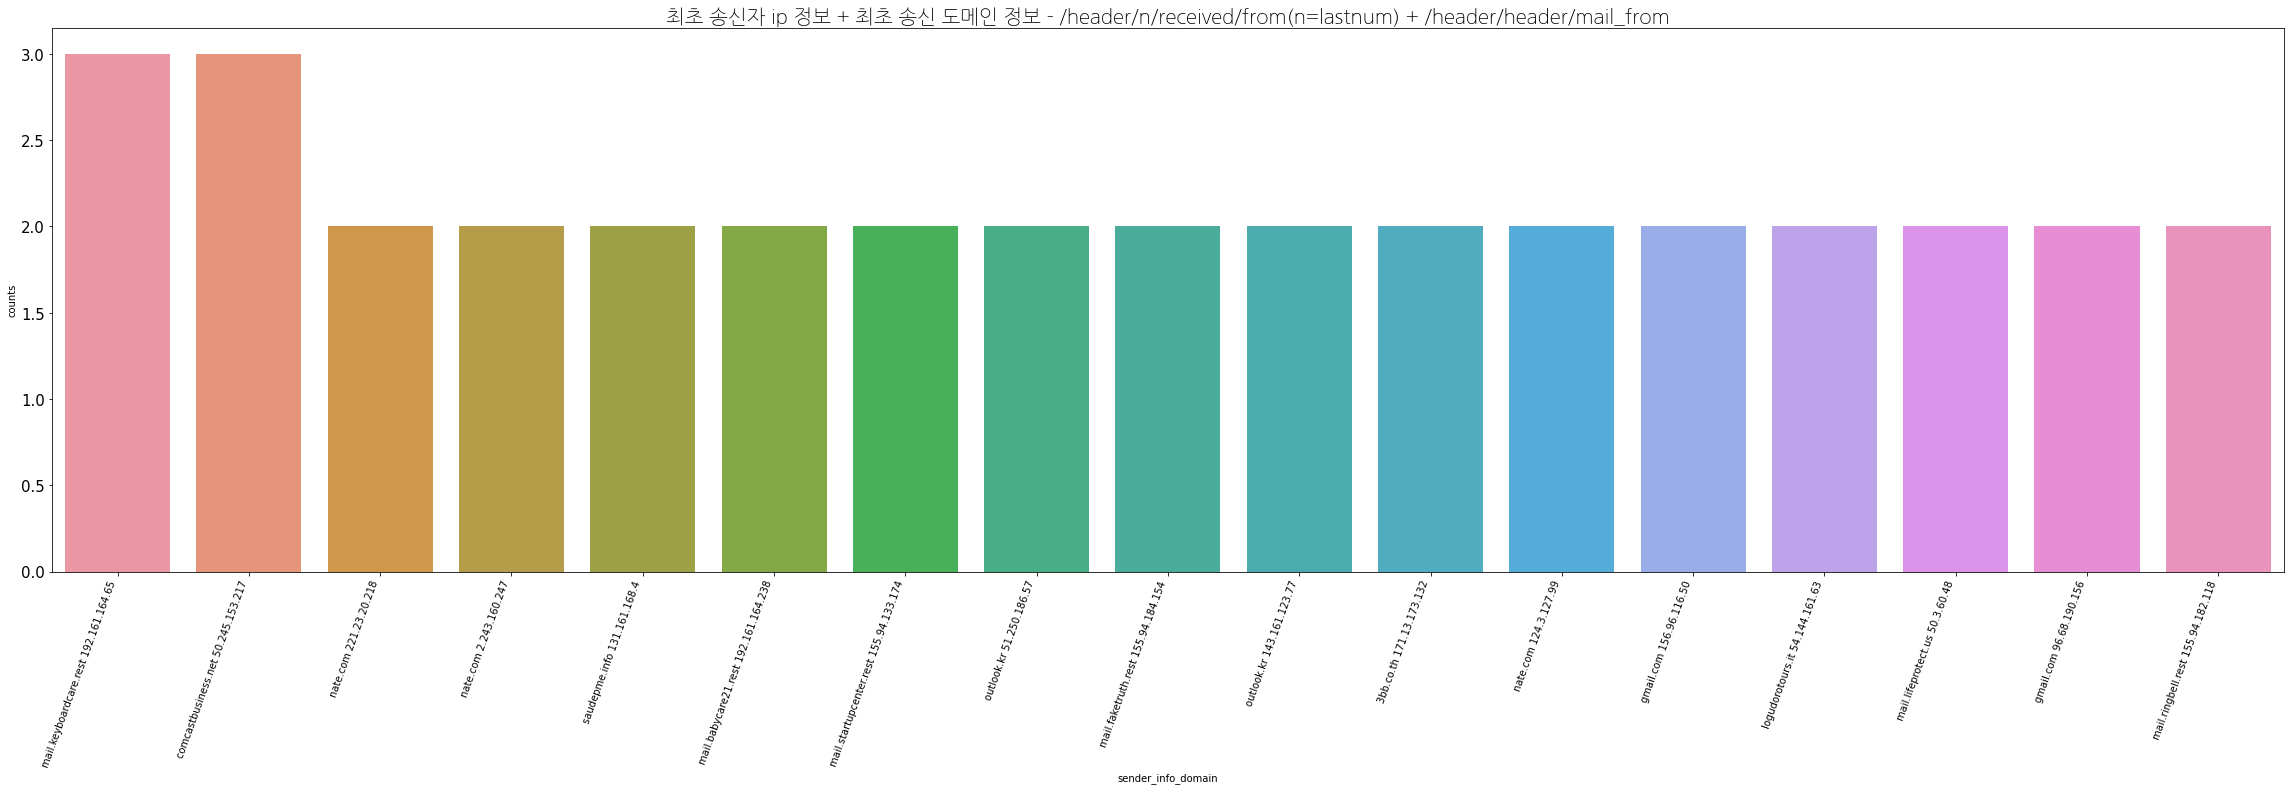

In [18]:
plt.figure(figsize=(40, 10))
plt.title('최초 송신자 ip 정보 + 최초 송신 도메인 정보 - /header/n/received/from(n=lastnum) + /header/header/mail_from', fontsize=20, fontproperties=fontprop)
ax = sns.barplot(x="sender_info_domain", y="counts", data=sender_df_domain[sender_limit_domain])
plt.xticks(rotation=70, ha='right', fontsize=10)
plt.yticks(fontsize=15)
plt.show()

In [5]:
eml_df["mail_from"] = eml_df["/header/header/mail_from"].str.strip().str.lower()
eml_df["from_"] = eml_df["/header/from"].str.strip().str.lower()
same = eml_df.mail_from == eml_df.from_

In [10]:
eml_df.loc[same, "is_forgery"] = '위조되지 않음'
eml_df.loc[~same, "is_forgery"] = '위조됨'

In [14]:
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14, 4)

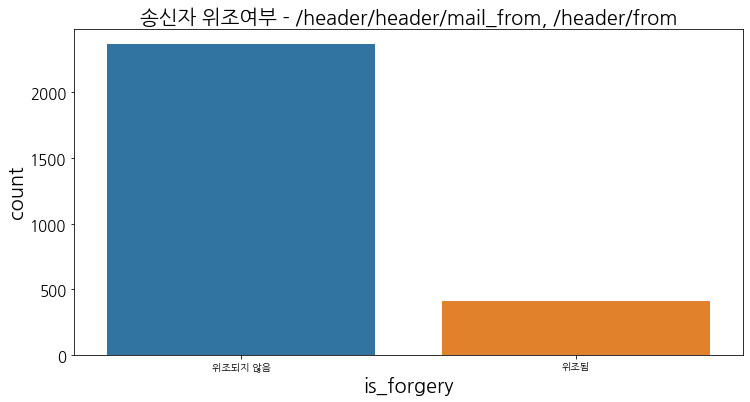

In [30]:
# 송신자 위조 여부 시각화
plt.figure(figsize=(12,6))
plt.title('송신자 위조여부 - /header/header/mail_from, /header/from', fontsize=20)
sns.countplot(x="is_forgery", data=eml_df)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.show()

In [16]:
eml_df['mail_from_and_date'] = eml_df["/header/header/mail_from"].str.cat(eml_df["/header/header/date"])

In [26]:
# df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
mail_from_and_date_df=eml_df['mail_from_and_date'].value_counts().rename_axis('mail_from_and_date').reset_index(name='counts')
mail_from_and_date_limit=mail_from_and_date_df.counts>1
mail_from_and_date_df[mail_from_and_date_limit]

,mail_from_and_date,counts
0,"juhan@nate.com Thu, 26 Mar 2020 19:03:19 +0200",2
1,"EarlBrownal@lumpress.it Tue, 02 Jun 2020 11:5...",2
2,"MarvinHowardvegyb@lius.it Mon, 01 Jun 2020 16...",2
3,"juhan@nate.com Thu, 26 Mar 2020 21:31:56 +0500",2
4,"BrandonRussell@comcastbusiness.net Sun, 05 Ap...",2
5,"GaryRossfegok@edatel.net.co Wed, 10 Jun 2020 ...",2
6,"juhan@nate.com Thu, 26 Mar 2020 11:31:02 -0500",2
7,"AndrewBellxbzaa@ertelecom.ru Sat, 23 May 2020...",2
8,"6naekyunafazalea@gmail.com Tue, 02 Jun 2020 0...",2
9,"RichardTorresaoeno@logudorotours.it Mon, 01 J...",2


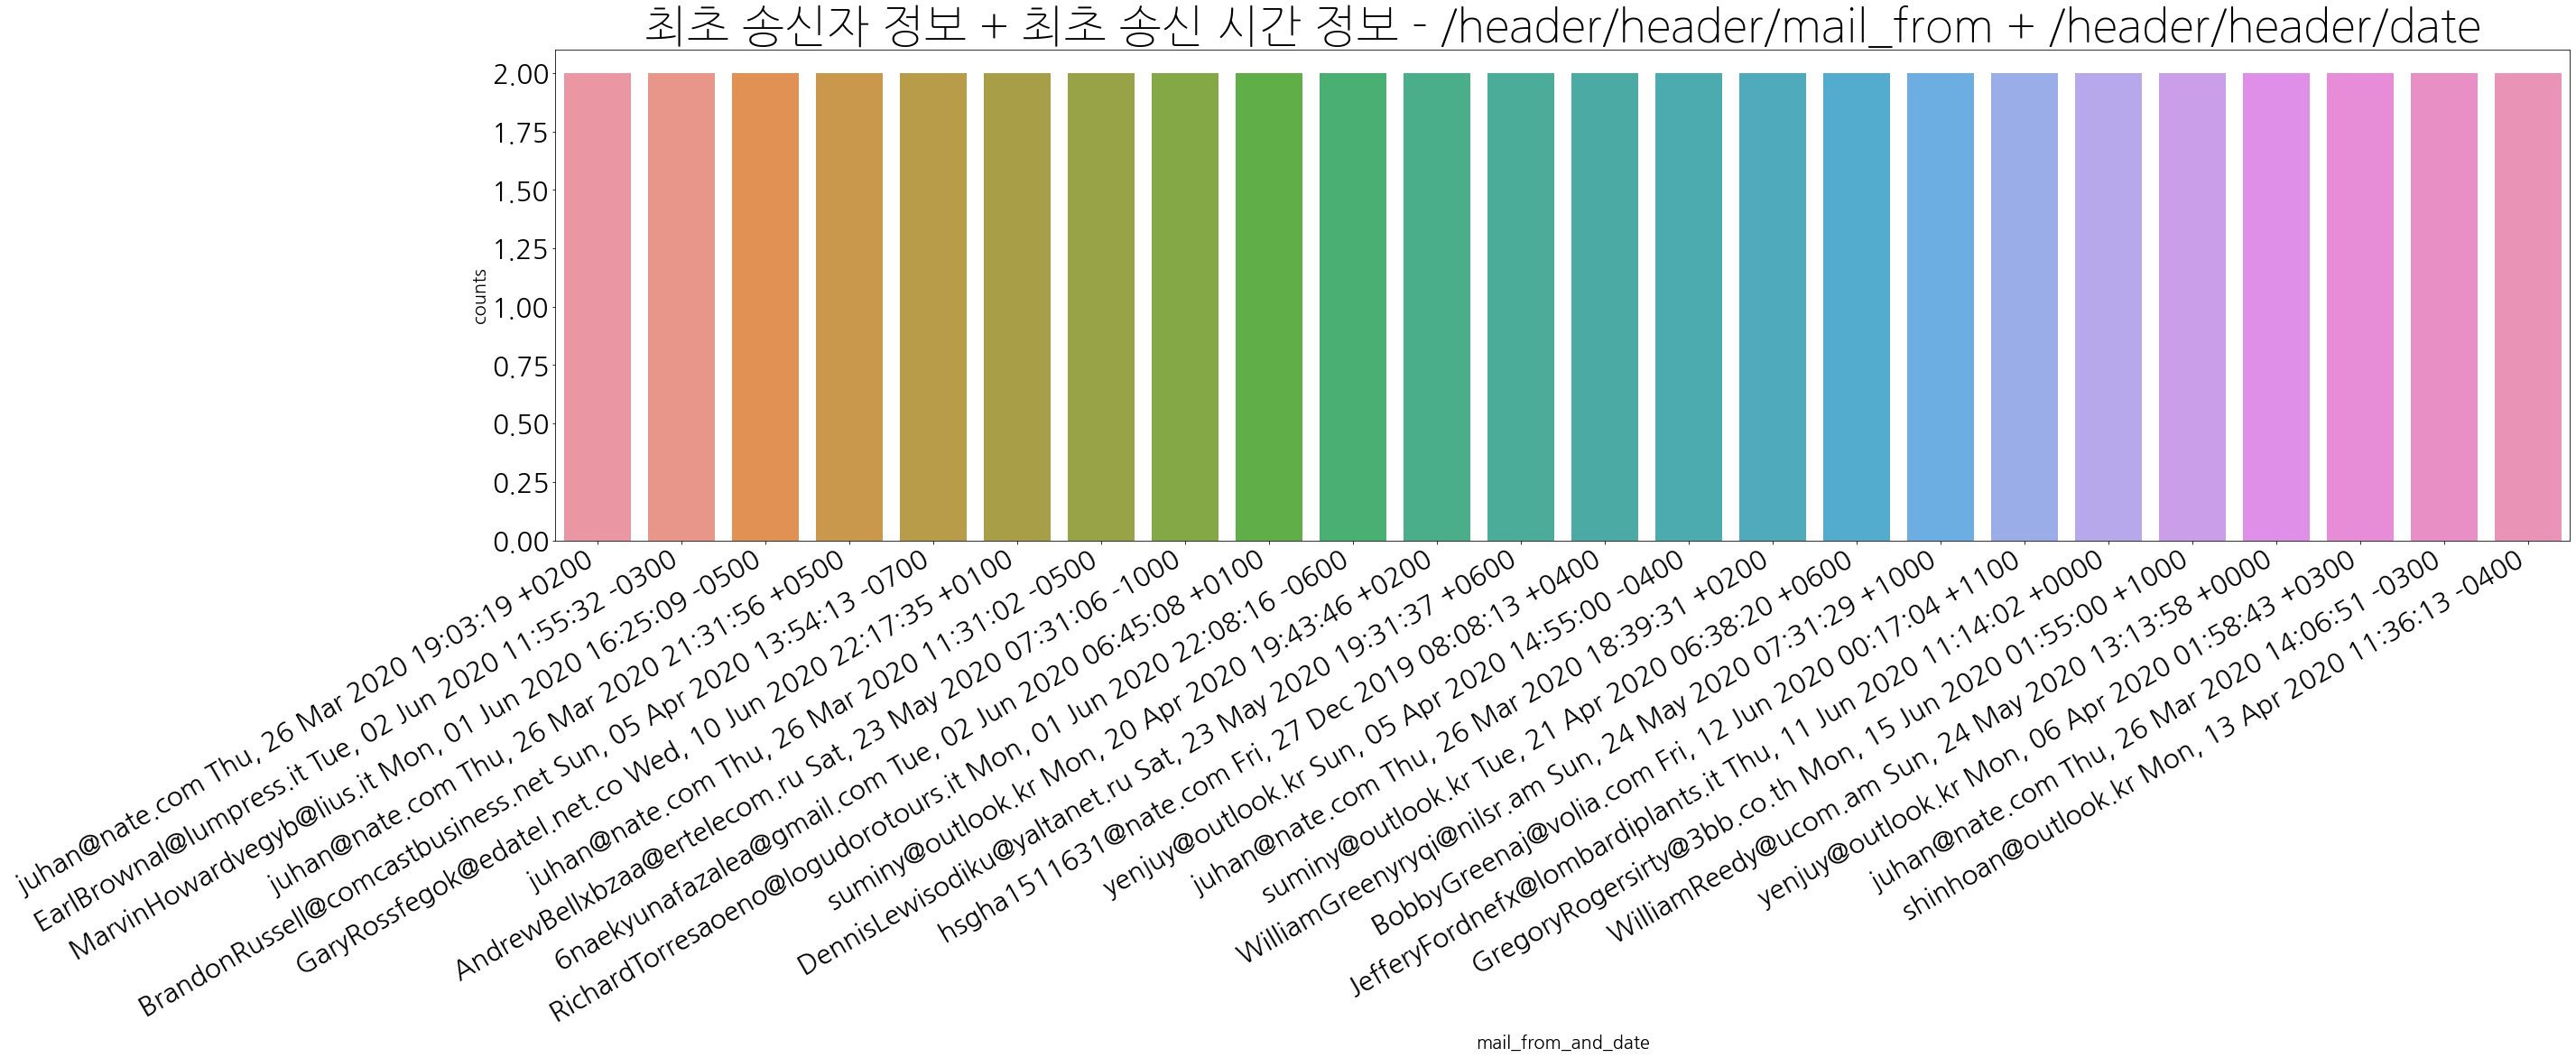

In [60]:
# 동일한 송신자가 동시간에 보낸 메일의 개수 확인
plt.figure(figsize=(40, 10))
plt.title('최초 송신자 정보 + 최초 송신 시간 정보 - /header/header/mail_from + /header/header/date', fontsize=50, fontproperties=fontprop)
ax = sns.barplot(x="mail_from_and_date", y="counts", data=mail_from_and_date_df[mail_from_and_date_limit])
plt.xticks(rotation=30, ha='right', fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [33]:
eml_df["/header/header/mail_from"].str.split('@', expand=True)[1].str.strip()

0                     outlook.kr
1                      gmail.com
2       supermidiatvacabo.com.br
3                      gmail.com
4                     outlook.kr
                  ...           
2769                 yahoo.co.jp
2770                   gmail.com
2771                 hanmail.net
2772                    nate.com
2773                  outlook.kr
Name: 1, Length: 2774, dtype: object

In [34]:
eml_df["/header/header/mail_from_domain"] = eml_df["/header/header/mail_from"].str.split('@', expand=True)[1].str.strip()

In [36]:
# df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
mail_from_domain_df=eml_df['/header/header/mail_from_domain'].value_counts().rename_axis('mail_from_domain').reset_index(name='counts')
mail_from_domain_limit=mail_from_domain_df.counts>1

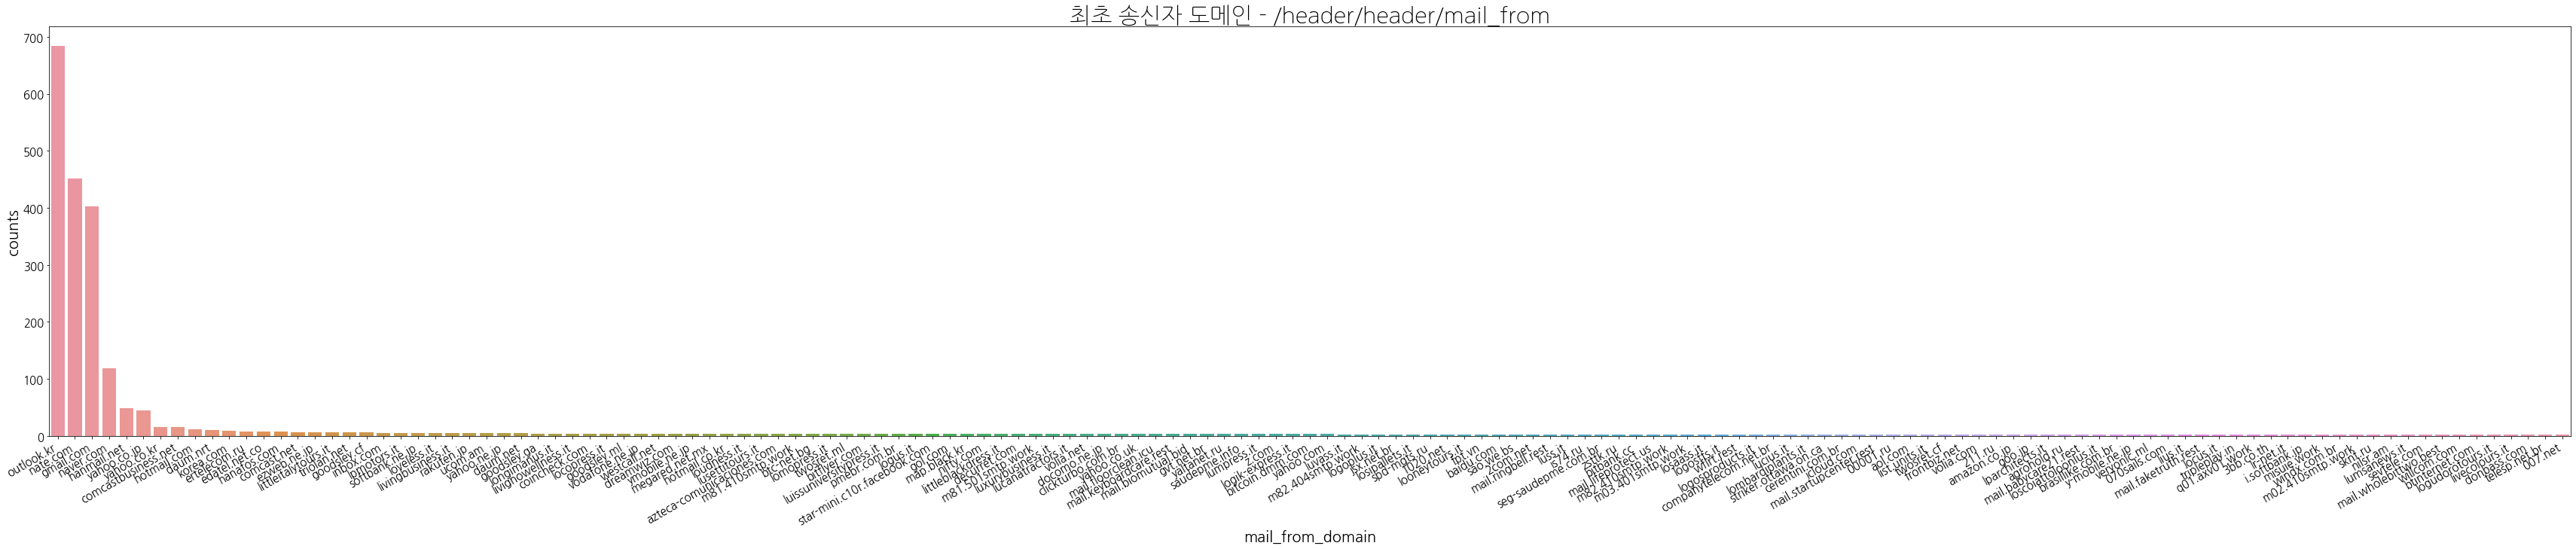

In [44]:
# 최초 송신자 메일주소 시각화
plt.figure(figsize=(60, 10))
plt.title('최초 송신자 도메인 - /header/header/mail_from', fontsize=30, fontproperties=fontprop)
ax = sns.barplot(x="mail_from_domain", y="counts", data=mail_from_domain_df[mail_from_domain_limit])
plt.xticks(rotation=30, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 송신자 IP와 메일 헤더의 subject 결합

In [45]:
for col in eml_df.columns:
    if 'subject' in col:
        print(col)

/header/subject
/header/header/subject


In [48]:
eml_df['/header/header/subject']

0                                                Ʈ Ȯ~! Ǯ帱
1                                      無料だから直メ直番だって交換し放題！
2        Ich wrde mit schlaffen Kiefern durch die Stra...
3                                 ƴմϴ.  Ư   ŰѰ! tmkmxkdx
4                                              ũ  ŵ   ֽϴ.
                              ...                        
2769                         特選パック新発売！無修正DVD【人妻・熟女25枚パック】
2770                                        ȥ ô е  θ õմϴ.
2771                         Ȳ򺸸  ΰ!   2̸ OK! ls  dkrj pqg
2772                                           2õ âڱ   ̺Ʈ
2773                                              ũ   Ƿ?
Name: /header/header/subject, Length: 2774, dtype: object

In [47]:
eml_df['/header/subject']

0                                                Ʈ Ȯ~! Ǯ帱
1                                      無料だから直メ直番だって交換し放題！
2       Ich wrde mit schlaffen Kiefern durch die Strae...
3                                 ƴմϴ.  Ư   ŰѰ! tmkmxkdx
4                                              ũ  ŵ   ֽϴ.
                              ...                        
2769                         特選パック新発売！無修正DVD【人妻・熟女25枚パック】
2770                                        ȥ ô е  θ õմϴ.
2771                         Ȳ򺸸  ΰ!   2̸ OK! ls  dkrj pqg
2772                                           2õ âڱ   ̺Ʈ
2773                                              ũ   Ƿ?
Name: /header/subject, Length: 2774, dtype: object

In [54]:
eml_df['sender_ip_and_subject'] = eml_df.loc[is_ip, '/header/header/subject'] + " " + eml_df.loc[is_ip, 'ori_sender_ip']

In [55]:
# df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
sender_ip_and_subject_df=eml_df['sender_ip_and_subject'].value_counts().rename_axis('sender_ip_and_subject').reset_index(name='counts')
sender_ip_and_subject_limit=sender_ip_and_subject_df.counts>1

C:\Users\bjg37\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bjg37\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 1012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bjg37\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 756 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bjg37\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bjg37\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 826 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bjg37\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 503 missing from curre

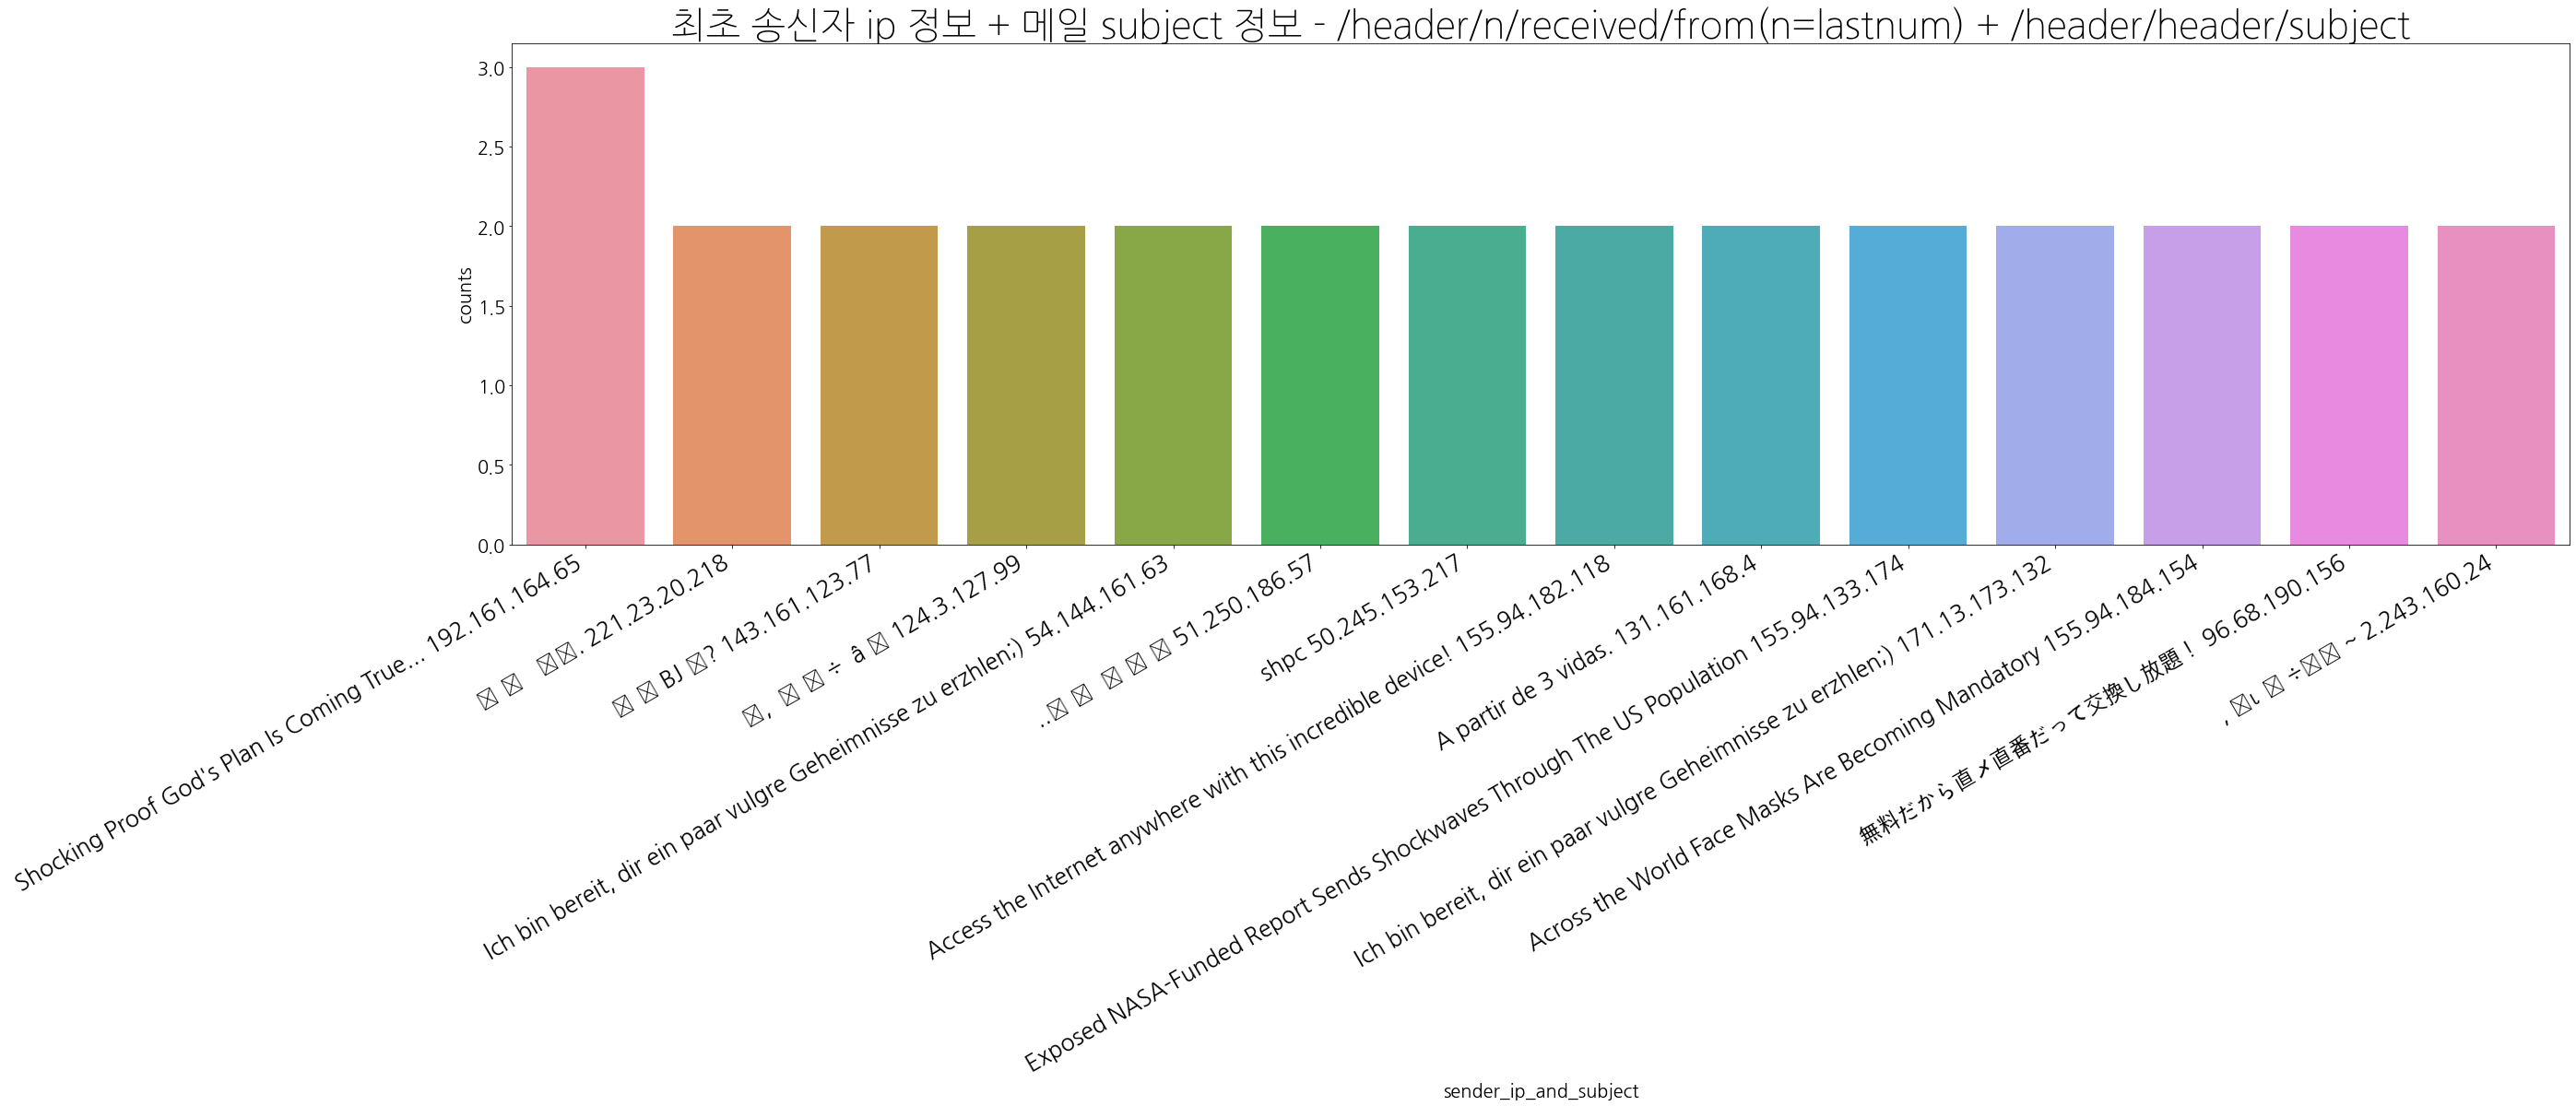

In [79]:
plt.figure(figsize=(40, 10))
plt.title('최초 송신자 ip 정보 + 메일 subject 정보 - /header/n/received/from(n=lastnum) + /header/header/subject', fontsize=40, fontproperties=fontprop)
ax = sns.barplot(x="sender_ip_and_subject", y="counts", data=sender_ip_and_subject_df[sender_ip_and_subject_limit])
plt.xticks(rotation=30, ha='right', fontsize=25)
plt.yticks(fontsize=20)
plt.show()

In [80]:
sender_ip_and_subject_df[sender_ip_and_subject_limit]

,sender_ip_and_subject,counts
0,Shocking Proof God's Plan Is Coming True... 1...,3
1,˰ ϴ ˴ϴ. 221.23.20.218,2
2,߳ ̺ BJ Ƿ? 143.161.123.77,2
3,"Ư, Ű ϰ ÷ â ȳ 124.3.127.99",2
4,"Ich bin bereit, dir ein paar vulgre Geheimnis...",2
5,..ũ Ǹ Ұ ˹ غ 51.250.186.57,2
6,shpc 50.245.153.217,2
7,Access the Internet anywhere with this incred...,2
8,A partir de 3 vidas. 131.161.168.4,2
9,Exposed NASA-Funded Report Sends Shockwaves T...,2


### The original type was:

In [86]:
content_df = pd.read_csv('./check_not_origin.csv')

In [89]:
content_df['content_0'].head()

0    \nThis message contained an attachment that wa...
1    \nThis message contained an attachment that wa...
2    \nThis message contained an attachment that wa...
3    \nThis message contained an attachment that wa...
4    \nThis message contained an attachment that wa...
Name: content_0, dtype: object

In [92]:
content_df['/header/received/0/from'].head()

0     imss.checkbox.kr 127.0.0.1
1     imss.checkbox.kr 127.0.0.1
2     imss.checkbox.kr 127.0.0.1
3     imss.checkbox.kr 127.0.0.1
4     imss.checkbox.kr 127.0.0.1
Name: /header/received/0/from, dtype: object

In [91]:
len(content_df)

117

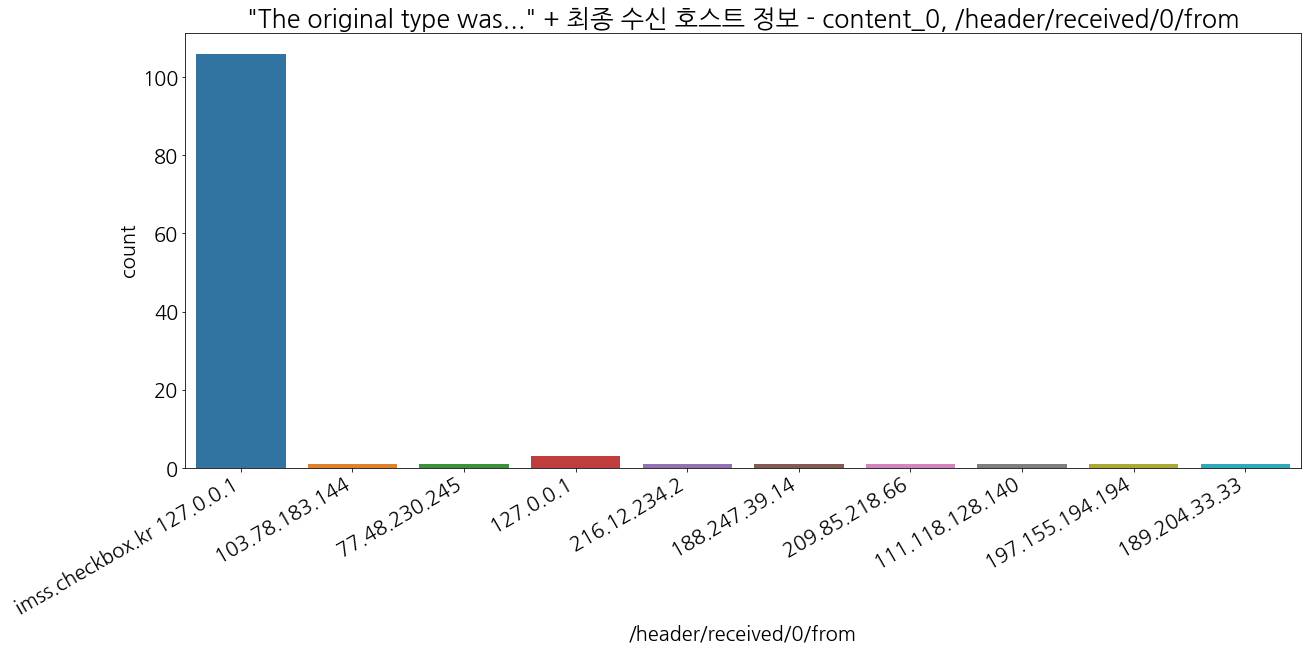

In [106]:
plt.figure(figsize=(20, 8))
plt.title('"The original type was..." + 최종 수신 호스트 정보 - content_0, /header/received/0/from', fontsize=25)
sns.countplot(x="/header/received/0/from", data=content_df)
plt.xticks(rotation=30, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [107]:
# df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
content_0_df=content_df['content_0'].value_counts().rename_axis('content').reset_index(name='counts')

In [105]:
content_0_df

,content,counts
0,\nThis message contained an attachment that wa...,18
1,\nThis message contained an attachment that wa...,7
2,\nThis message contained an attachment that wa...,4
3,\nThis message contained an attachment that wa...,3
4,\nThis message contained an attachment that wa...,3
5,\nThis message contained an attachment that wa...,2
6,\nThis message contained an attachment that wa...,2
7,\nThis message contained an attachment that wa...,2
8,\nThis message contained an attachment that wa...,1
9,\nThis message contained an attachment that wa...,1


In [11]:
for col in eml_df.columns:
    if 'dkim-signature' in col:
        print(col)

/header/header/dkim-signature
/header/header/x-google-dkim-signature


In [15]:
domainkey_signature_df = eml_df["/header/header/domainkey-signature"].value_counts().rename_axis('domainkey_signature').reset_index(name='counts')

In [68]:
domainkey_signature_df["domainkey_signature"].str.split(';')[2]

[' a=rsa-sha1',
 ' c=nofws',
 ' q=dns',
 ' s=k1',
 ' d=adoptmode.rest',
 ' b=Yemn5gATc4QMWfs4BHcOGftpkSuq86uN3sUvNx+aLX1VCFd9IJ2+kJWjEk9jCfu5odDROoBwNhmG   INdy/zAFKYi9cViyYUlQqvoVM6mluSUeP5sIMRZGF78XcrnDXs8ZNPhTquuLgs8E83SO8ySRGBF+   HQX0NMd98AePtmBgzlQ=',
 '']

In [12]:
eml_df["/header/header/dkim-signature"].value_counts().rename_axis('domainkey-signature').reset_index(name='counts')

,domainkey-signature,counts
0,v=1; a=rsa-sha256; q=dns/txt; c=relaxed/relax...,1
1,v=1; a=rsa-sha256; c=relaxed/relaxed; d=front...,1
2,v=1; a=rsa-sha1; c=relaxed/relaxed; s=dkim; d...,1
3,v=1; a=rsa-sha256; c=relaxed/relaxed; d=nic.e...,1
4,v=1; a=rsa-sha1; c=relaxed/relaxed; s=k1; d=n...,1
...,...,...
184,v=1; a=rsa-sha1; c=relaxed/relaxed; s=k1; d=w...,1
185,v=1; a=rsa-sha256; q=dns/txt; c=relaxed/relax...,1
186,v=1; a=rsa-sha1; c=relaxed/relaxed; s=k1; d=s...,1
187,v=1; a=rsa-sha256; c=relaxed/simple;\td=pmail...,1
